<a href="https://colab.research.google.com/github/johyunkang/py_pandas/blob/main/python_ml_perfect_guide_05_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 회귀 실습 - 캐글 주택 가격 : 고급 회귀 기법


79개의 변수로 구성된 미국 아이오와 주의 에임스(Ames) 지방의 주택 가격 정보를 가지고 있음  
(train data URL : [kaggle-train-data](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data))




성능 평가는 앞의 **자전거 대여 예측**과 동일하게 RMSLE(Root Mean Squared Log Error)를 기반으로 함.

#### 피처 설명



#####   


- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

#### 데이터 전처리 (Preprocessing)

In [11]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

df_org = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/house-prices/train.csv')
df = df_org.copy()
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [12]:
print('DF Shape:', df.shape)
print('\n전체 피처의 type \n', df.dtypes.value_counts())
isnull_series = df.isnull().sum()
print('\nNull 컬럼과 그 건수:\n', isnull_series[isnull_series >0].sort_values(ascending=False))
# print('\n DF info():', df.info())
# print(df.isnull())


DF Shape: (1460, 81)

전체 피처의 type 
 object     43
int64      35
float64     3
dtype: int64

Null 컬럼과 그 건수:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


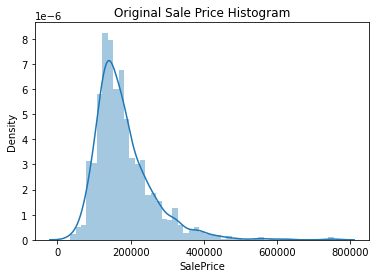

In [13]:
# 회귀 모델 적용전 타겟값이 정규 분포인지 확인
plt.title('Original Sale Price Histogram')
sns.distplot(df['SalePrice'])  # Distribution Plot

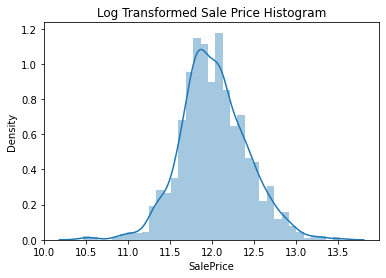

In [14]:
# 정규 분포가 아닌 결과값을 정규 분포 형태로 하기 위해 로그 변환 적용
plt.title('Log Transformed Sale Price Histogram')
log_saleprice = np.log1p(df['SalePrice'])
sns.distplot(log_saleprice)

In [15]:
# SalePrice 로그 변환
original_SalePrice = df['SalePrice']
df['SalePrice'] = np.log1p(df['SalePrice'])

# Null 이 너무 많은 컬럼과 불필요한 컬럼 삭제
df.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

# drop 하지 않은 숫자형 Null 컬럼은 평균으로 대체
# fillna(df.mean()) 의 의미는 DF에 있는 숫자형 피처들만 해당 피처의 평균값으로 Null 값 대체. Object 피처는 제외됨.
df.fillna(df.mean(), inplace=True)

# Null 값이 있는 피처명과 타입을 추출
null_column_count = df.isnull().sum()[df.isnull().sum() > 0]
type(null_column_count)
print('\n## Null 피처의 type:\n', df.dtypes[null_column_count.index])


## Null 피처의 type:
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


In [22]:
print(type(null_column_count))
print(null_column_count.values)
print(null_column_count.values.reshape(-1, 1))

<class 'pandas.core.series.Series'>
[ 8 37 37 38 37 38  1 81 81 81 81]
[[ 8]
 [37]
 [37]
 [38]
 [37]
 [38]
 [ 1]
 [81]
 [81]
 [81]
 [81]]


In [23]:
# get_dummies() 이용 한 원-핫인코딩 시 object 피처의 Null 값은 'None' 값으로 자동으로 채워진다.
print('get_dummies() 수행 전 shape:', df.shape)
df_one = pd.get_dummies(df)
print('get_dummies() 수행 후 shape:', df_one.shape)

null_column_count = df_one.isnull().sum()[df_one.isnull().sum() > 0]
print('\nNull 피처의 type:\n', df_one.dtypes[null_column_count.index])

get_dummies() 수행 전 shape: (1460, 75)
get_dummies() 수행 후 shape: (1460, 271)

Null 피처의 type:
 Series([], dtype: object)


#### 선형 회귀 모델 학습 / 예측 / 평가

In [28]:
# get_rmse()는 단일 모델의 RMSE 값을, get_rmses()는 get_rmse()를 이용해 여러 모델의 rmse 값을 반환
def get_rmse(model) :
    pred = model.predict(x_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, ' 로그 변환된 RMSE:', np.round(rmse, 3))

    return rmse


def get_rmses(models) :
    rmses = []
    for model in models :
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [29]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = df_one['SalePrice']
x_features = df_one.drop('SalePrice', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size=0.2, random_state=156)

# LineRegression, Ridge, Lasso 학습 예측 평가
lr = LinearRegression()
lr.fit(x_train, y_train)

rg = Ridge()
rg.fit(x_train, y_train)

ls = Lasso()
ls.fit(x_train, y_train)

models = [lr, rg, ls]
get_rmses(models)
# 라쏘의 회귀 성능이 타 모델에 비해 약간 떨어짐. 추후 하이퍼 파라미터 튜닝이 필요해 보임
# LinearRegression  로그 변환된 RMSE: 0.132
# Ridge  로그 변환된 RMSE: 0.128
# Lasso  로그 변환된 RMSE: 0.176

LinearRegression  로그 변환된 RMSE: 0.132
Ridge  로그 변환된 RMSE: 0.128
Lasso  로그 변환된 RMSE: 0.176


[0.13189576579154205, 0.12750846334052995, 0.17628250556471403]

In [30]:
# 피처별 회귀 계수 값의  상위 하위 각 10개 시각화.
def get_top_bottom_coef(model, n=10) :
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명.
    coef = pd.Series(model.coef_, index=x_features.columns)

    # + 상위 10개, - 하위 10개의 회귀 계수를 추출해 변환
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)

    return coef_high, coef_low

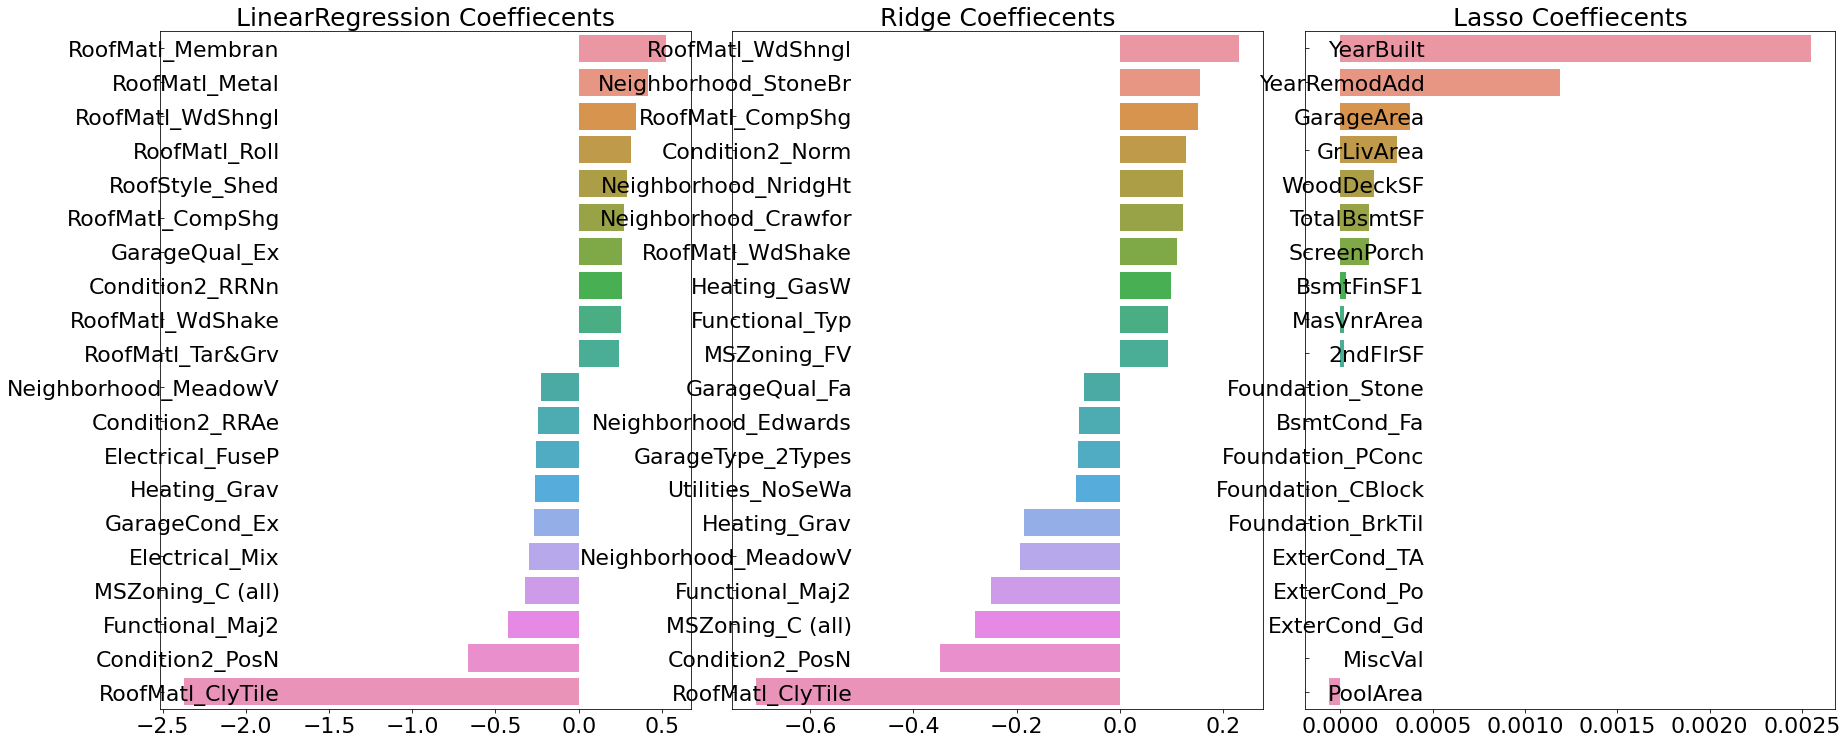

In [32]:

def visualize_coefficient(models) :
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24, 10), nrows=1, ncols=3)
    fig.tight_layout()

    # 입력 인자로 받은 list 객체인 models에서 차례로 model을 추출해 회귀 계수 시각화.
    for i_num, model in enumerate(models) :
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 pandas concat 으로 결합
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])

        # ax subplot에 barchar로 표현, 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis='y', direction='in', pad=-120)

        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()) :
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])


# 앞 예제에서 학습한 lr, rg, ls 모델의 회귀 계수 시각화
models = [lr, rg, ls]
visualize_coefficient(models)

위 그래프의 모델별 회귀 계수를 보면 OLS 기반의 LinearRegression 과 Ridge의 경우는 회귀 계수가 유사함.  
하지만 라쏘는 전체 적으로 회귀 계수 값이 매우 작고, 그 중에 YearBuilt가 가장 크고 다른 피처의 회귀 계수는 너무 작음. 

혹시 데이터 분할에 문제가 있어서 그런건지 확인하기 위해 train_test_split 으로 분할하지 않고 전체 데이터 세트로 교차 검증 후 RMSE를 측정하겠음.  
이를 위해 cross_val_score()를 이용

In [34]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models) :

    for model in models :
        # 분할하지 않고 전체 데이터로 cross_val_score() 수행. 모델별 CV RMSE 값과 평균 RMSE 출력
        rmse_list = np.sqrt(- cross_val_score(model, x_features, y_target, scoring='neg_mean_squared_error', cv=5))
        rmse_avg = np.mean(rmse_list)
        print('\n {} CV RMSE 값 리스트: {}'.format(model.__class__.__name__, np.round(rmse_list, 3)))
        print('\n {} CV 평균 RMSE :{}'.format(model.__class__.__name__, np.round(rmse_avg, 3)))


# 앞 예제에서 학습한 lr, rg, ls 모델의 CV RMSE 출력
models = [lr, rg, ls]
get_avg_rmse_cv(models)


 LinearRegression CV RMSE 값 리스트: [0.135 0.165 0.168 0.111 0.198]

 LinearRegression CV 평균 RMSE :0.155

 Ridge CV RMSE 값 리스트: [0.117 0.154 0.142 0.117 0.189]

 Ridge CV 평균 RMSE :0.144

 Lasso CV RMSE 값 리스트: [0.161 0.204 0.177 0.181 0.265]

 Lasso CV 평균 RMSE :0.198


In [38]:
help(np.sqrt)
#p. 362

Help on ufunc object:

sqrt = class ufunc(builtins.object)
 |  Functions that operate element by element on whole arrays.
 |  
 |  To see the documentation for a specific ufunc, use `info`.  For
 |  example, ``np.info(np.sin)``.  Because ufuncs are written in C
 |  (for speed) and linked into Python with NumPy's ufunc facility,
 |  Python's help() function finds this page whenever help() is called
 |  on a ufunc.
 |  
 |  A detailed explanation of ufuncs can be found in the docs for :ref:`ufuncs`.
 |  
 |  Calling ufuncs:
 |  ===============
 |  
 |  op(*x[, out], where=True, **kwargs)
 |  Apply `op` to the arguments `*x` elementwise, broadcasting the arguments.
 |  
 |  The broadcasting rules are:
 |  
 |  * Dimensions of length 1 may be prepended to either array.
 |  * Arrays may be repeated along dimensions of length 1.
 |  
 |  Parameters
 |  ----------
 |  *x : array_like
 |      Input arrays.
 |  out : ndarray, None, or tuple of ndarray and None, optional
 |      Alternate array 